In [2]:
#set working directory
import os
os.chdir("D:\edwisor_project\python_files")

In [3]:
%matplotlib inline

In [4]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp
import seaborn as sns
import scipy.stats as stats


In [5]:
#Load data
df_original = pd.read_csv("day.csv")

In [6]:
#all the processing will be done on copy of data
df = df_original.copy()


In [7]:
#rename variables,if required
df.rename(columns={'dteday': 'date', 'yr': 'year','mnth':'month','weathersit':'weather','atemp':'feel_temp',
                   'hum':'humidity','cnt':'count'},
          inplace=True)

In [8]:
#map the categorical variables
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df["weather"] = df.weather.map({1: "weather1", 2 : "weather2", 3 : "weather3", 4 :"weather4" })
df["weekday"] = df.weekday.map({0:"sunday", 1: "monday", 2 : "tuesday", 3 : "wednesday", 4 :"thursday",
                               5:"friday",6:"saturday"})

In [9]:
#convert data types
conversion_list = ['season','weather','workingday','holiday','weekday']
df[conversion_list] = df[conversion_list].apply(lambda x: x.astype('category'),axis= 0)

DATA PRE-PROCESSING

In [10]:
#removing column instant(index numbers) as it has no corelation to any other variable.
#day,season,workingday,holiday are already derived in the table therfore date attribute not required.
df = df.drop(columns=["date","instant"])

In [11]:
#check for missing values ,if any
print(df.isnull().sum())

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
feel_temp     0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [12]:
#check for duplicates
print(df.duplicated(subset=None, keep='first').sum())

0


UNIVARIATE ANALYSIS

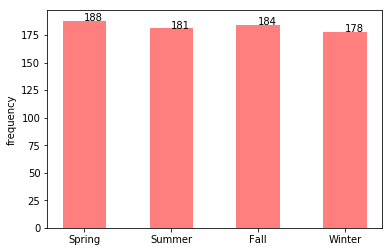

In [13]:
#season barplot
season_table = pd.DataFrame({"category":df.season.value_counts().index, "frequency":df.season.value_counts().values}).sort_values('category').reset_index(drop = True)
labels = ("Spring","Summer","Fall","Winter")

plt.bar(x = season_table.category, height = season_table.frequency, align='center',color = 'red', alpha=.5,width = 0.5)
plt.xticks(season_table.category, labels)
plt.ylabel('frequency')
for a,b in zip(season_table.category, season_table.frequency):
    plt.text(a, b, str(b))
#plt.show()
plt.savefig('seasons.png')
#plt.close() 

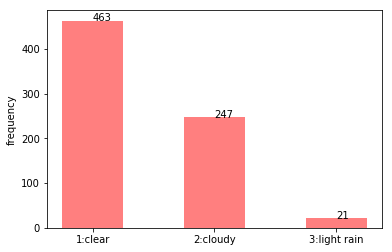

In [14]:
#weather barplot
weather_table = pd.DataFrame({"category":df.weather.value_counts().index, "frequency":df.weather.value_counts().values})
labels = ("1:clear","2:cloudy","3:light rain","4:heavy rain")

plt.bar(x = weather_table.category, height = weather_table.frequency, align='center',color = 'red', alpha=.5,width = 0.5)
plt.xticks(weather_table.category, labels)
plt.ylabel('frequency')
for a,b in zip(weather_table.category, weather_table.frequency):
    plt.text(a, b, str(b))
#plt.show()
plt.savefig('weather.png')
#plt.close() 


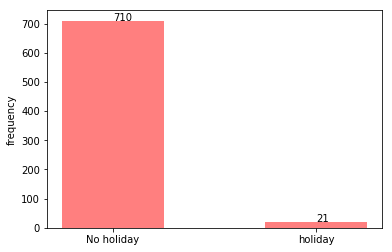

In [15]:
#holiday barplot
holiday_table = pd.DataFrame({"category":df.holiday.value_counts().index, "frequency":df.holiday.value_counts().values})
labels = ("No holiday","holiday")

plt.bar(x = holiday_table.category, height = holiday_table.frequency, align='center',color = 'red', alpha=.5,width = 0.5)
plt.xticks(holiday_table.category, labels)
plt.ylabel('frequency')
for a,b in zip(holiday_table.category, holiday_table.frequency):
    plt.text(a, b, str(b))
#plt.show()
plt.savefig('holiday.png')
#plt.close() 


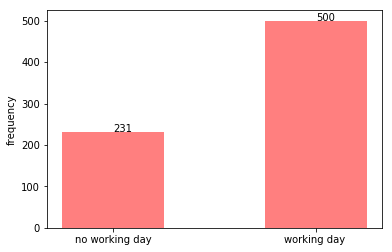

In [16]:
#workingday barplot
workingday_table = pd.DataFrame({"category":df.workingday.value_counts().index, "frequency":df.workingday.value_counts().values})
labels = ("working day ","no working day")

plt.bar(x = workingday_table.category, height = workingday_table.frequency, align='center',color = 'red', alpha=.5,width = 0.5)
plt.xticks(workingday_table.category, labels)
plt.ylabel('frequency')
for a,b in zip(workingday_table.category, workingday_table.frequency):
    plt.text(a, b, str(b))
#plt.show()
plt.savefig('workingday.png',)
#plt.close() 

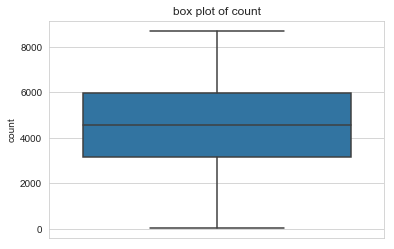

In [17]:
#count boxplot
sns.set_style('whitegrid')
sns.boxplot(y="count", 
            data=df).set(ylabel = 'count',title="box plot of count")

plt.savefig('boxplot_count.png',bbox_inches='tight')

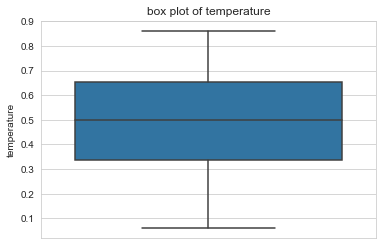

In [18]:
#temperature boxplot
sns.set_style('whitegrid')
sns.boxplot(y="temp", 
            data=df).set(ylabel = 'temperature',title="box plot of temperature")

plt.savefig('boxplot_temp.png',bbox_inches='tight')

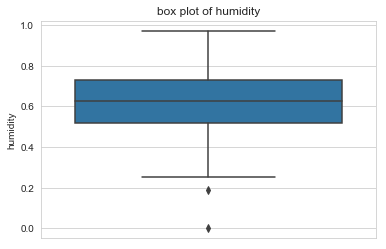

In [19]:
#humidity boxplot
sns.set_style('whitegrid')
sns.boxplot(y="humidity", 
            data=df).set(ylabel = 'humidity',title="box plot of humidity")

plt.savefig('boxplot_humidity.png',bbox_inches='tight')

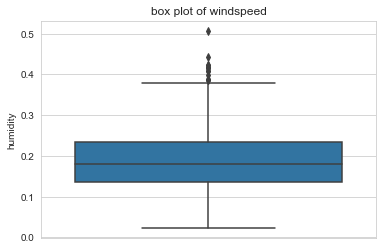

In [20]:
#windspeed boxplot
sns.set_style('whitegrid')
sns.boxplot(y="windspeed", 
            data=df).set(ylabel = 'humidity',title="box plot of windspeed")

plt.savefig('boxplot_windspeed.png',bbox_inches='tight')

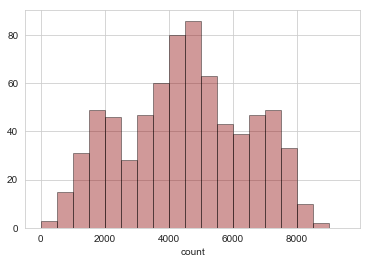

In [21]:
#count distribution plot 
sns.distplot(df['count'], hist=True, kde=False, 
             bins = np.arange(0,10000, 500),color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [22]:
#from statsmodels.graphics.gofplots import qqplot
#qqplot(df['count'], line='s')

#Shapiro-Wilk Normality Test
#from scipy.stats import shapiro

#stat_value, p_value = shapiro(t)

#print('Statistics=%.5f, p=%.5f' % (stat_value, p_value))

# interpret
#alpha = 0.05
#if p > alpha:
#	print('Sample looks Gaussian (fail to reject H0 hypothesis)')
#else:
#	print('Sample does not look Gaussian (reject H0 hypothesis)')

MULTIVARIATE ANALYSIS

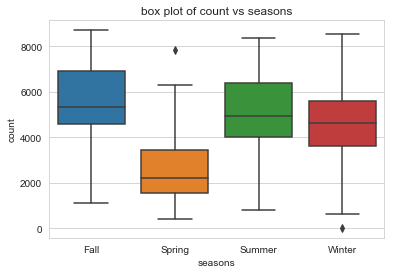

In [23]:
#boxplot of rental count & season
sns.set_style('whitegrid')
sns.boxplot(x="season", y="count", 
            data=df).set(xlabel = 'seasons', ylabel = 'count',title="box plot of count vs seasons")

plt.savefig('count_vs_season.png',bbox_inches='tight')


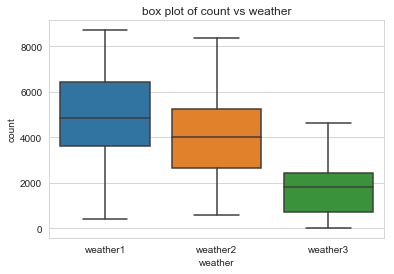

In [24]:
#boxplot of rental count & weather
sns.boxplot(x = "weather", y="count", 
            data=df).set(xlabel = 'weather', ylabel = 'count',title="box plot of count vs weather")

plt.savefig('count_vs_weather.png',bbox_inches='tight')

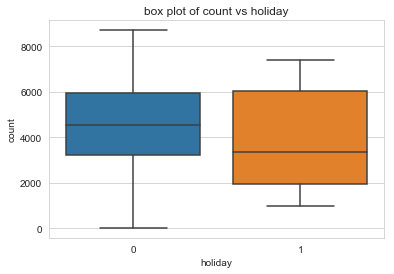

In [25]:
#boxplot of rental count & holiday
sns.boxplot(x="holiday", y="count", 
            data=df).set(xlabel = 'holiday', ylabel = 'count',title="box plot of count vs holiday")

plt.savefig('count_vs_holiday.png',bbox_inches='tight')

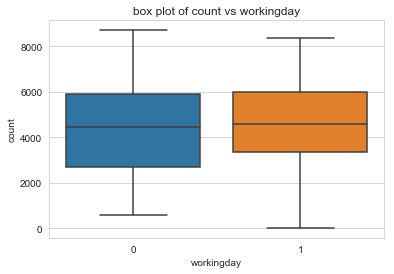

In [26]:
#boxplot of rental count & working day
sns.boxplot(x="workingday", y="count", 
            data=df).set(xlabel = 'workingday', ylabel = 'count',title="box plot of count vs workingday")

plt.savefig('count_vs_workingday.png',bbox_inches='tight')

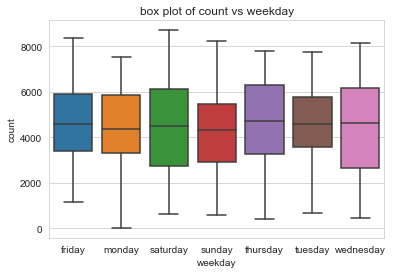

In [27]:
#boxplot of rental count & weekday
sns.boxplot(x="weekday", y="count", 
            data=df).set(xlabel = 'weekday', ylabel = 'count',title="box plot of count vs weekday")

plt.savefig('count_vs_weekday.png',bbox_inches='tight')

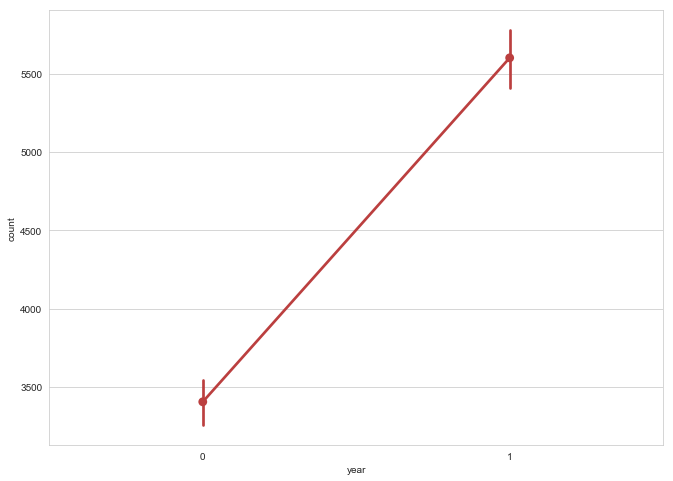

In [28]:
#Lineplot of rental count & year
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.set(style="whitegrid")
sns.pointplot(x="year", y="count", data=df,color="#bb3f3f")
plt.savefig("count_vs_year.png",bbox_inches='tight',dpi=100)

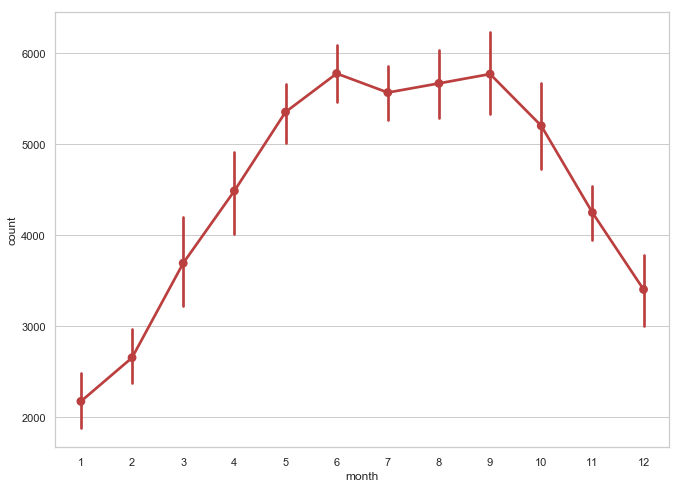

In [29]:
#Lineplot of rental count & month
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.set(style="whitegrid")
sns.pointplot(x="month", y="count", data=df,color="#bb3f3f")
plt.savefig("count_vs_month.png",bbox_inches='tight',dpi=100)

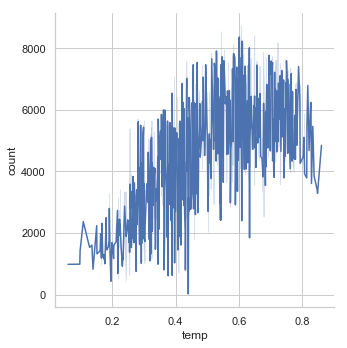

In [30]:
# scatter plot of rental v.s. temperature
sns.set(style="whitegrid")
sns.relplot(x="temp", y="count", data=df,kind = "line");
plt.savefig("count_vs_temp.png",bbox_inches='tight',dpi=100)

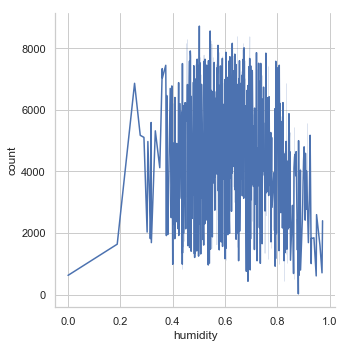

In [31]:
# line plot of rental v.s. humidity
sns.set(style="whitegrid")
sns.relplot(x="humidity", y="count", data=df,kind = "line");
plt.savefig("count_vs_humidity.png",bbox_inches='tight',dpi=100)

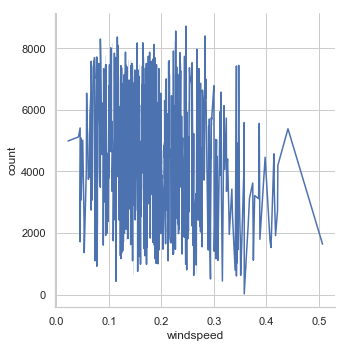

In [32]:
# line plot of rental v.s. wind speed
sns.set(style="whitegrid")
sns.relplot(x="windspeed", y="count", data=df,kind = "line");
plt.savefig("count_vs_windspeed.png",bbox_inches='tight',dpi=100)

In [33]:
#outliers treatment

#save numeric names
cnames =  ("count", "temp", "humidity", "windspeed")

for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
df = df.drop(df[df.loc[:,i] < min].index)
df = df.drop(df[df.loc[:,i] > max].index)

count
-1054.0
10162.0
temp
-0.14041600000000015
1.1329160000000003
humidity
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


FEATURE ENGINEERING

In [34]:
numeric_data = df.select_dtypes(include=['float64','int64'])

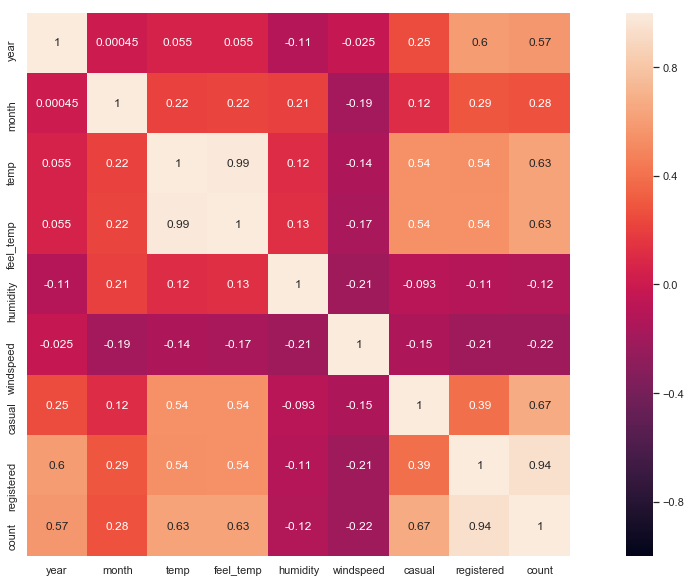

In [35]:
corr_data = numeric_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_data,vmin = -1 ,vmax = 1, square=True,annot=True)

ANOVA analysis for categorical variables

In [36]:
stats.f_oneway(df['count'][df['season'] == "Spring"], 
             df['count'][df['season'] == 'Summer'],
             df['count'][df['season'] == 'Fall'],
             df['count'][df['season'] == 'Winter'])

F_onewayResult(statistic=126.27589085344565, pvalue=1.2812657449397594e-65)

In [37]:
stats.f_oneway(df['count'][df['weather'] == 'weather1'], 
             df['count'][df['weather'] == 'weather2'],
             df['count'][df['weather'] == 'weather3'])

F_onewayResult(statistic=41.79736539021139, pvalue=6.803110440290453e-18)

In [38]:
stats.f_oneway(df['count'][df['workingday'] == 0], 
             df['count'][df['workingday'] == 1])

F_onewayResult(statistic=2.1132952864974843, pvalue=0.14646274029075307)

In [39]:
stats.f_oneway(df['count'][df['holiday'] == 0], 
             df['count'][df['holiday'] == 1])

F_onewayResult(statistic=3.630929032189285, pvalue=0.05711542662625648)

In [40]:
stats.f_oneway(df['count'][df['weekday'] == 'sunday'], 
              df['count'][df['weekday'] == 'monday'],
              df['count'][df['weekday'] == 'tuesday'],
              df['count'][df['weekday'] == 'wednesday'],
              df['count'][df['weekday'] == 'thursday'],
              df['count'][df['weekday'] == 'friday'],
              df['count'][df['weekday'] == 'saturday'])

F_onewayResult(statistic=0.7235648584651495, pvalue=0.630722042692331)

In [41]:
#conclusion based on anova,correlation plot
#remove weekday,holiday,workingday,feel_temp,casual,registered
df = df.drop(columns=["feel_temp","casual","registered","weekday","holiday","workingday"], axis = 1);

In [42]:
# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df,drop_first = True)

In [43]:
#reorder columns
cols = df.columns.tolist()
cols = cols[:5] + cols[6:] + cols[5:6]

df = df[cols]

Sampling of data

In [44]:
#another method for data sampling(not used just stated)
#separate in to Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict.
#labels = np.array(df['count'])
# Convert to numpy array
#features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

#train_features, test_features, train_labels, test_labels = train_test_split(features, 
#                                                                            labels, 
#                                                                            test_size = 0.25, 
#                                                                            random_state = 42)

In [45]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

train, test = train_test_split(df,test_size = 0.20, random_state = 42)

In [46]:
# Saving feature names for later use
feature_list = list(df.drop('count', axis = 1).columns)

Linear Regression Model

In [47]:
import statsmodels.api as sm

In [48]:
model_lr = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()

In [49]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1837.
Date:                Tue, 28 Aug 2018   Prob (F-statistic):               0.00
Time:                        04:20:56   Log-Likelihood:                -4690.6
No. Observations:                 574   AIC:                             9401.
Df Residuals:                     564   BIC:                             9445.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
year              2079.0664     73.018     28.473      0.000    1935.646    2222.487
month               34.4291     18.579      1.853      0.064      -2.063      70.922
temp              6640.6916    293.562     22.621      0.000    6064.083    7217.300
humidity          -203.3452    316.062     -0.643      0.520    -824.149     417.458
windspeed        -1120.8499    498.343     -2.249      0.025   -2099.684    -142.016
season_Spring       94.4168    145.726      0.648      0.517    -191.816     380.649
season_Summer      818.7517    112.816      7.257      0.000     597.160    1040.343
season_Winter     1180.3458    147.714      7.991      0.000     890.208    1470.483
weather_weather2  -576.0773     96.182     -5.989      0.000    -764.995    -387.160
weather_weather3 -2028.3044    240.513     -8.433      0.000   -2500.714   -1555.895
==============================================================================
Omnibus:                       74.298   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.498
Skew:                          -0.751   Prob(JB):                     9.36e-33
Kurtosis:                       4.978   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
predictions_lr = model_lr.predict(test.iloc[:,0:10])

In [51]:
#define error metrics
##1.Root Mean Squared Error Loss 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#2.Root Mean Squared Logarithmic Error Loss 
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))

In [52]:
print("RMSE is:",rmse(predictions_lr,test["count"]))
print("RMSLE is:",rmsle(predictions_lr,test["count"]))

RMSE is: 906.6211034173523
RMSLE is: 0.5559030038970376


Random Forest Model

In [85]:
#separate in to Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict.
train_labels = np.array(train['count'])
test_labels = np.array(test['count'])

In [86]:
# Remove the labels from the features(data)
train_features= train.drop('count', axis = 1)
test_features= test.drop('count', axis = 1)

In [55]:
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

In [56]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (574, 10)
Training Labels Shape: (574,)
Testing Features Shape: (144, 10)
Testing Labels Shape: (144,)


In [57]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [58]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [59]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

In [60]:
#error metrics
print("RMSE is:",rmse(predictions_rf,test_labels))
print("RMSLE is:",rmsle(predictions_rf,test_labels))

RMSE is: 772.8717667573933
RMSLE is: 0.4893351348665226


In [133]:
##write to csv file
data = pd.DataFrame(test_features)
data["count"] = test_labels
data["predicted_count"] = predictions_rf

data.to_csv("submit_py.csv",index = False)